In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../..")

In [2]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

(-0.5, 41.5, 41.5, -0.5)

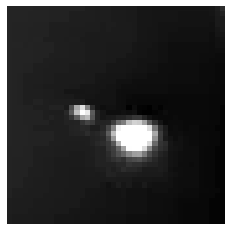

In [5]:
t, x, y, w = (0, 657, 437, 42)
training_image = dt.LoadImage(f"data/PhC-C2DL-PSC/t{t:03d}.tif")()._value / 256
crop = training_image[y:y+w, x:x+w]
plt.imshow(crop, cmap="gray")
plt.axis("off")


In [6]:

model = dt.models.AutoMultiTracker(input_shape=(None, None, 1))

train_set =   (
    dt.Value(crop)
    >> dt.Affine(rotate=lambda: np.random.rand()*np.pi*2, scale=lambda:np.random.uniform(0.75, 1.5, 2))
    >> dt.Add(lambda: np.random.randn() * 0.2)
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.01))  
    >> dt.Multiply(lambda: np.random.uniform(0.3, 1.6))
    
)

model.fit(
    train_set,
    epochs=30,
    batch_size=8,
)



Generating 163 / 160 samples before starting training
Epoch 1/30
163/163 [==============================] - 6s 11ms/step - total_loss: 3.2133 - consistency_loss: 1.5953
Epoch 2/30
163/163 [==============================] - 2s 11ms/step - total_loss: 3.3115 - consistency_loss: 1.6774
Epoch 3/30
163/163 [==============================] - 2s 12ms/step - total_loss: 3.1902 - consistency_loss: 1.6447
Epoch 4/30
163/163 [==============================] - 2s 12ms/step - total_loss: 3.1661 - consistency_loss: 1.6138
Epoch 5/30
163/163 [==============================] - 2s 12ms/step - total_loss: 3.1505 - consistency_loss: 1.5393
Epoch 6/30
163/163 [==============================] - 2s 12ms/step - total_loss: 3.0530 - consistency_loss: 1.4132
Epoch 7/30
163/163 [==============================] - 2s 11ms/step - total_loss: 3.0261 - consistency_loss: 1.2513
Epoch 8/30
163/163 [==============================] - 2s 11ms/step - total_loss: 2.8060 - consistency_loss: 1.1521
Epoch 9/30
163/163 [======

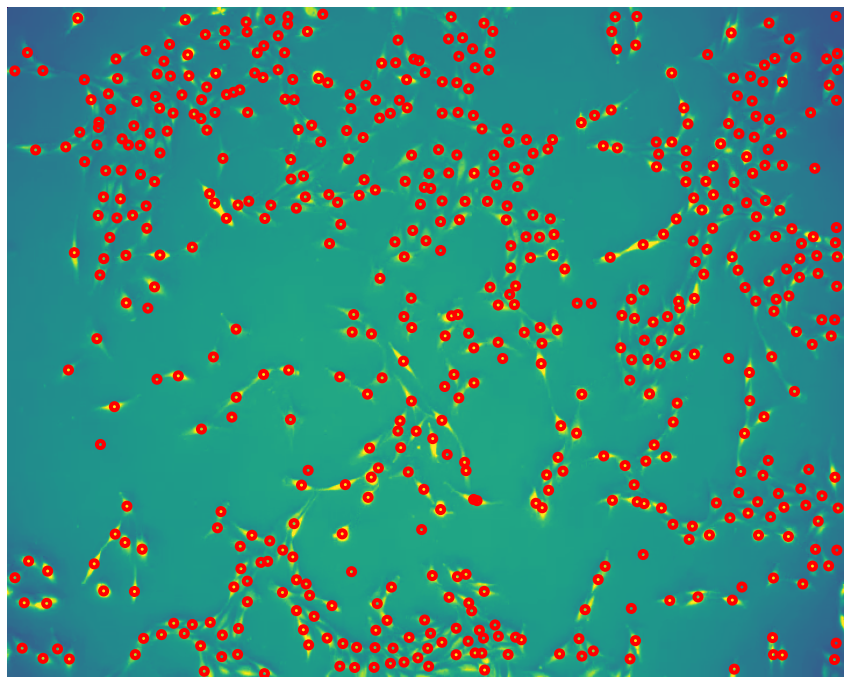

In [ ]:
#May need to tune these to get optimal performance!
alpha = 1
cutoff = 0.93

frame_index = 299

image = (dt.LoadImage(f"data/PhC-C2DL-PSC/t{frame_index:03d}.tif"))()._value / 256


detections = model.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
# detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis("off")
plt.scatter(detections[:, 1], detections[:, 0], s=50, linewidths=4, facecolors="none", edgecolors="r")